# Scaling

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# read dataframe in
df = pd.read_csv('data/kickstarter_preprocess.csv')

In [3]:
df.columns

Index(['backers_count', 'country', 'goal', 'staff_pick', 'state',
       'usd_pledged', 'blurb_len_c', 'blurb_len_w', 'slug_len_c', 'slug_len_w',
       'cat_in_slug', 'category_parent_id', 'category_id', 'category_name',
       'created_year', 'created_month', 'deadline_year', 'deadline_month',
       'launched_year', 'launched_month', 'duration_days', 'preparation',
       'pledged_per_backer', 'rel_pledged_goal', 'filled_parent',
       'parent_name'],
      dtype='object')

### features to keep: preparation, duration_days, goal, pledged_per_backer, parent_name, blurb_len_w, slug_len_w, 'launched_month', 'usd_pledged'

In [4]:
# drop unimportant features
df.drop(['backers_count', 'country', 'blurb_len_c', 'slug_len_c', 'cat_in_slug', 
         'category_parent_id', 'category_id', 'category_name', 'created_year', 'created_month', 'deadline_year', 
         'deadline_month', 'launched_year', 'rel_pledged_goal', 'filled_parent', 'staff_pick'], 
        axis=1, inplace=True)

In [5]:
df.columns

Index(['goal', 'staff_pick', 'state', 'usd_pledged', 'blurb_len_w',
       'slug_len_w', 'launched_month', 'duration_days', 'preparation',
       'pledged_per_backer', 'parent_name'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177593 entries, 0 to 177592
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   goal                177593 non-null  float64
 1   staff_pick          177593 non-null  bool   
 2   state               177593 non-null  object 
 3   usd_pledged         177593 non-null  int64  
 4   blurb_len_w         177593 non-null  int64  
 5   slug_len_w          177593 non-null  int64  
 6   launched_month      177593 non-null  int64  
 7   duration_days       177593 non-null  int64  
 8   preparation         177593 non-null  int64  
 9   pledged_per_backer  177593 non-null  int64  
 10  parent_name         177593 non-null  object 
dtypes: bool(1), float64(1), int64(7), object(2)
memory usage: 13.7+ MB


## drop rows with state == canceled, rows with wrong categories

In [7]:
df = df.drop(df[df['state'] == "canceled" ].index)
df.shape

(168975, 11)

In [8]:
df = df.drop(df[df['state'] == "failed" ].index)
df.shape

(94777, 11)

In [9]:
categories = ["Games", "Art", "Photography", "Film & Video", "Design", "Technology"]
df = df[df.parent_name.isin(categories)]
df.shape

(43376, 11)

## make dummies (staff_pick, state, category_name)

In [10]:
#df.staff_pick = df.staff_pick.astype('int')

In [11]:
df['state'] = np.where(df['state'] == 'successful', 1, 0)

In [12]:
# convert the categorical variable parent_name into dummy/indicator variables
df_dum2 = pd.get_dummies(df.parent_name, prefix='parent_name')
df = df.drop(['parent_name'], axis=1)
df = pd.concat([df, df_dum2], axis=1)

In [13]:
# making a categorical variable for launched_month q1, q2, q3, q4 
df.loc[df['launched_month'] <  4, 'time_yr'] = 'q1'
df.loc[(df['launched_month'] >=  4) & (df['launched_month'] <  7), 'time_yr'] = 'q2'
df.loc[(df['launched_month'] >=  7) & (df['launched_month'] <  10), 'time_yr'] = 'q3'
df.loc[df['launched_month'] >  9, 'time_yr'] = 'q4'

In [14]:
df_dum3 = pd.get_dummies(df.time_yr, prefix='time_yr')
df = df.drop(['time_yr'], axis=1)
df = df.drop(['launched_month'], axis=1)
df = pd.concat([df, df_dum3], axis=1)

In [15]:
df.columns

Index(['goal', 'staff_pick', 'state', 'usd_pledged', 'blurb_len_w',
       'slug_len_w', 'duration_days', 'preparation', 'pledged_per_backer',
       'parent_name_Art', 'parent_name_Design', 'parent_name_Film & Video',
       'parent_name_Games', 'parent_name_Photography',
       'parent_name_Technology', 'time_yr_q1', 'time_yr_q2', 'time_yr_q3',
       'time_yr_q4'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43376 entries, 0 to 177591
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   goal                      43376 non-null  float64
 1   staff_pick                43376 non-null  int64  
 2   state                     43376 non-null  int64  
 3   usd_pledged               43376 non-null  int64  
 4   blurb_len_w               43376 non-null  int64  
 5   slug_len_w                43376 non-null  int64  
 6   duration_days             43376 non-null  int64  
 7   preparation               43376 non-null  int64  
 8   pledged_per_backer        43376 non-null  int64  
 9   parent_name_Art           43376 non-null  uint8  
 10  parent_name_Design        43376 non-null  uint8  
 11  parent_name_Film & Video  43376 non-null  uint8  
 12  parent_name_Games         43376 non-null  uint8  
 13  parent_name_Photography   43376 non-null  uint8  
 14  paren

In [17]:
df.head()

,goal,staff_pick,state,usd_pledged,blurb_len_w,slug_len_w,duration_days,preparation,pledged_per_backer,parent_name_Art,parent_name_Design,parent_name_Film & Video,parent_name_Games,parent_name_Photography,parent_name_Technology,time_yr_q1,time_yr_q2,time_yr_q3,time_yr_q4
0,"1,000.00",0,1,1950,22,4,30,8,41,0,0,0,1,0,0,0,0,1,0
16,"2,602.33",0,1,2861,19,3,21,2,38,0,0,0,0,1,0,0,0,0,1
18,"5,000.00",0,1,5466,25,7,29,0,84,1,0,0,0,0,0,1,0,0,0
21,"8,999.00",1,1,15420,13,4,30,12,32,0,0,0,1,0,0,1,0,0,0
23,600.00,0,1,3801,22,4,29,15,41,1,0,0,0,0,0,1,0,0,0


## Train-Test-Split

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
y = df['usd_pledged']
X = df.drop('usd_pledged', axis=1)
y

0          1950
16         2861
18         5466
21        15420
23         3801
          ...  
177568    39002
177585      247
177588     8924
177590     2681
177591     5692
Name: usd_pledged, Length: 43376, dtype: int64

In [20]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### remove outliers

In [21]:
new = pd.concat([X_train, y_train], axis=1)
new.shape

(34700, 19)

In [22]:
lower = new['usd_pledged'].quantile(0.025)
upper = new['usd_pledged'].quantile(0.975)

In [23]:
new_2 = new[(new['usd_pledged'] < upper) & (new['usd_pledged'] > lower)]

#new.drop(new[new['usd_pledged'] > (new['usd_pledged'].quantile(0.975)) and 
#new.new['usd_pledged'] < (new['usd_pledged'].quantile(0.025))].index, inplace=True)
new_2.shape

(32959, 19)

In [24]:
y_train = new_2['usd_pledged']
X_train = new_2.drop('usd_pledged', axis=1)

### log-transformation target value

In [24]:
#y_train_log = y_train + 0.00001
#y_train_log = np.log(y_train_log)
#y_train_log

## Scaling


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# we have to define which columns we want to scale.
col_scale = ['goal', 'blurb_len_w', 'slug_len_w', 'duration_days', 'preparation', 'pledged_per_backer']

### Data standardization

In [27]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled_st = scaler.fit_transform(X_train[col_scale])
X_test_scaled_st = scaler.transform(X_test[col_scale])

In [28]:
# Concatenating scaled and dummy columns 
X_train_preprocessed_st = np.concatenate([X_train_scaled_st, X_train.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed_st = np.concatenate([X_test_scaled_st, X_test.drop(col_scale, axis=1)], axis=1)

### Data normalization

# Scaling with MinMaxScaler

# Try to scale you data with the MinMaxScaler() from sklearn. 
# It follows the same syntax as the StandardScaler.
# Don't forget: you have to import the scaler at the top of your notebook. 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled_nor = scaler.fit_transform(X_train[col_scale])
X_test_scaled_nor = scaler.transform(X_test[col_scale])

# Concatenating scaled and dummy columns 
X_train_preprocessed_nor = np.concatenate([X_train_scaled_nor, X_train.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed_nor = np.concatenate([X_test_scaled_nor, X_test.drop(col_scale, axis=1)], axis=1)

## Model Regression

### Polynomial Regression

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
from sklearn.linear_model import LinearRegression
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train_preprocessed_st)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [49]:
X_poly_test = poly_reg.fit_transform(X_test_preprocessed_st)
X_poly_test.shape

(8676, 7315)

In [50]:
#y_pred = np.exp(pol_reg.predict(X_poly_test)) - 0.001
#y_pred = pd.DataFrame(y_pred)
#y_pred

In [51]:
pol_reg.predict(X_poly_test)

array([-1562.17456055, 15034.43554688,  4044.26977539, ...,
       -7838.69799805,  5400.70092773,  2159.52050781])

In [52]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_poly_test))))
print("R2:", r2_score(y_test, pol_reg.predict(X_poly_test)))

RMSE: 370053.06601605273
R2: -6.506371690196761


(array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 array([-1302343.98460934,  -556107.42850065,   190129.12760803,
          936365.68371672,  1682602.23982541,  2428838.79593409,
         3175075.35204278,  3921311.90815147,  4667548.46426015,
         5413785.02036884,  6160021.57647752]),
 <a list of 8676 Lists of Patches objects>)

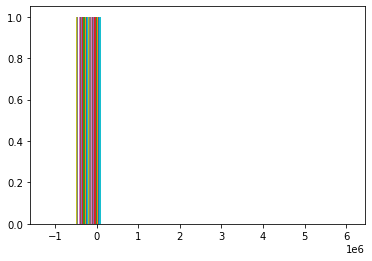

In [30]:
plt.hist(y_test - (pol_reg.predict(X_poly_test)))

In [56]:
y_test_2 = y_test['usd_pledged']
y_test_2.shape

(8676,)

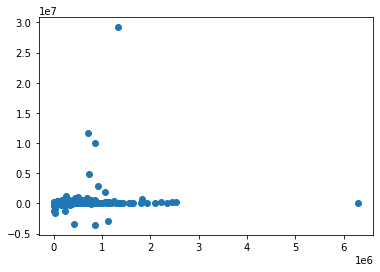

In [53]:
pol_reg.predict(X_poly_test)
plt.scatter(y_test, pol_reg.predict(X_poly_test))

In [47]:
res = y_test - (pol_reg.predict(X_poly_test))
res

155091      445.50
42443    -1,992.48
32165      -396.58
93612    -3,150.12
133240   -1,573.11
            ...   
29974    -1,779.72
152909   -6,272.48
54489       227.86
144028   -8,280.45
132934   -1,530.38
Name: usd_pledged, Length: 8676, dtype: float64

(array([8.625e+03, 3.100e+01, 1.300e+01, 6.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-101317.26542702,  530853.60413844, 1163024.47370389,
        1795195.34326935, 2427366.21283481, 3059537.08240027,
        3691707.95196573, 4323878.82153118, 4956049.69109664,
        5588220.5606621 , 6220391.43022756]),
 <a list of 10 Patch objects>)

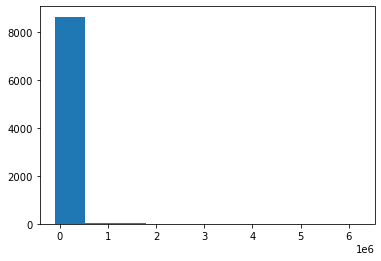

In [36]:
plt.hist(res)

(array([3.000e+00, 8.555e+03, 9.500e+01, 1.500e+01, 7.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-1302343.98460934,  -556107.42850065,   190129.12760803,
          936365.68371672,  1682602.23982541,  2428838.79593409,
         3175075.35204278,  3921311.90815147,  4667548.46426015,
         5413785.02036884,  6160021.57647752]),
 <a list of 10 Patch objects>)

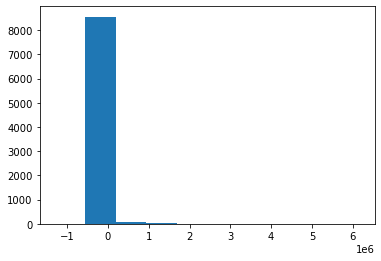

In [35]:
plt.hist(res['usd_pledged'])

In [36]:
res.describe()

,usd_pledged
count,"8,676.00"
mean,-773.03
std,"118,065.64"
min,"-1,302,343.98"
25%,"-20,044.61"
50%,"-1,863.42"
75%,"8,642.64"
max,"6,160,021.58"


In [30]:
#y_pred = np.exp(pol_reg.predict(X_poly_test)) - 0.001
#y_pred

array([[ 2103.82440723],
       [12951.41199412],
       [ 3056.91254041],
       ...,
       [ 2686.80532675],
       [ 3569.71849767],
       [ 2506.60723378]])

In [31]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

RMSE: 90117632.55674891
R2: -445164.60283843236


(array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([-8.39286622e+09, -7.55295310e+09, -6.71303997e+09, -5.87312684e+09,
        -5.03321372e+09, -4.19330059e+09, -3.35338746e+09, -2.51347434e+09,
        -1.67356121e+09, -8.33648083e+08,  6.26504356e+06]),
 <a list of 8676 Lists of Patches objects>)

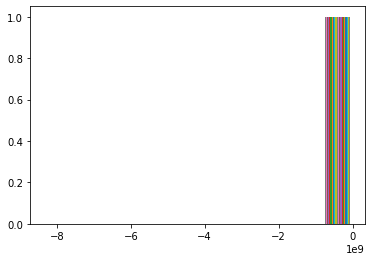

In [32]:
plt.hist(y_test - y_pred)

In [32]:
y_test

155091      405
42443      9665
32165      1698
93612      9592
133240     3089
          ...  
29974     13420
152909    35399
54489       895
144028     3592
132934     4275
Name: usd_pledged, Length: 8676, dtype: int64

In [33]:
y_pred

array([ 2103.82540723, 12951.41299412,  3056.91354041, ...,
        2686.80632675,  3569.71949767,  2506.60823378])

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [44]:
from sklearn.linear_model import LinearRegression
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train_preprocessed_st)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [45]:
X_poly_test = poly_reg.fit_transform(X_test_preprocessed_st)

In [46]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_poly_test))))
print("R2:", r2_score(y_test, pol_reg.predict(X_poly_test)))

RMSE: 130043.61974650709
R2: 0.07299911071294474


In [ ]:
from sklearn.linear_model import LinearRegression
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train_preprocessed_st)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

In [ ]:
X_poly_test = poly_reg.fit_transform(X_test_preprocessed_st)

In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_poly_test))))
print("R2:", r2_score(y_test, pol_reg.predict(X_poly_test)))

In [ ]:
from sklearn.linear_model import LinearRegression
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train_preprocessed_st)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

In [ ]:
X_poly_test = poly_reg.fit_transform(X_test_preprocessed_st)

In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_poly_test))))
print("R2:", r2_score(y_test, pol_reg.predict(X_poly_test)))

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
# Create the model with 100 trees
model = RandomForestRegressor(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [57]:
# Fit on training data
model.fit(X_train_preprocessed_st, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished


RandomForestRegressor(max_features='sqrt', n_jobs=-1, random_state=42,
                      verbose=1)

In [58]:
y_pred = model.predict(X_test_preprocessed_st)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [59]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

RMSE: 124700.1247665013
R2: 0.14761494267890607


In [60]:
res = y_test - y_pred
res

155091     -614.95
42443    -2,508.62
32165    -3,959.43
93612    -6,145.36
133240   -5,959.48
            ...   
29974    -1,889.70
152909   -1,141.82
54489    -2,401.96
144028   -3,567.85
132934       -1.00
Name: usd_pledged, Length: 8676, dtype: float64

### Adaboost

In [97]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=50, n_informative=2,
                       random_state=42, shuffle=False)

regr = AdaBoostRegressor(random_state=42, n_estimators=5)
regr.fit(X_train_preprocessed_st, y_train)

y_pred = regr.predict(X_test_preprocessed_st)

In [98]:
y_train_pred = regr.predict(X_train_preprocessed_st)

In [99]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

RMSE: 125020.29448118582
R2: 0.14323229704878038


In [100]:
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
#print("R2:", r2_score(y_train, y_train_pred))

RMSE: 20673.687775228293


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_hastie_10_2   

In [ ]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostRegressor

# TODO: Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_C = AdaBoostClassifier(random_state = 101)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in clf_C:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))